In [2]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 60.6 kB/s eta 0:00:0000:0100:01


In [15]:
conda install -c alubbock pygraphviz # took around 120 mins

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::daal4py==2021.3.0=py39h01d92e1_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::scipy==1.7.1=py39h88652d9_2
  - defaults/osx-64::scikit-learn==0.24.2=py39hb2f4e1b_0
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/osx-64::bottleneck==1.3.2=py39he3068b8_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::patsy==0.5.2=py39hecd8cb5_0
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39ha952a84_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb

cssselect-1.1.0      | 18 KB     | ##################################### | 100% 
xarray-0.20.1        | 563 KB    | ##################################### | 100% 
tomli-2.0.1          | 25 KB     | ##################################### | 100% 
w3lib-1.21.0         | 22 KB     | ##################################### | 100% 
pure_eval-0.2.2      | 14 KB     | ##################################### | 100% 
automat-20.2.0       | 31 KB     | ##################################### | 100% 
typing_extensions-4. | 42 KB     | ##################################### | 100% 
libprotobuf-3.20.1   | 1.8 MB    | ##################################### | 100% 
tabulate-0.8.10      | 45 KB     | ##################################### | 100% 
python-fastjsonschem | 231 KB    | ##################################### | 100% 
pygraphviz-1.9       | 124 KB    | ##################################### | 100% 
panel-0.13.1         | 11.0 MB   | ##################################### | 100% 
datashape-0.5.4      | 103 K

requests-file-1.5.1  | 8 KB      | ##################################### | 100% 
rsa-4.7.2            | 28 KB     | ##################################### | 100% 
libgd-2.3.3          | 198 KB    | ##################################### | 100% 
stack_data-0.2.0     | 22 KB     | ##################################### | 100% 
fribidi-1.0.10       | 63 KB     | ##################################### | 100% 
google-auth-2.6.0    | 83 KB     | ##################################### | 100% 
smart_open-5.2.1     | 77 KB     | ##################################### | 100% 
scrapy-2.6.2         | 366 KB    | ##################################### | 100% 
llvmlite-0.38.0      | 236 KB    | ##################################### | 100% 
pango-1.50.7         | 523 KB    | ##################################### | 100% 
pyasn1-0.4.8         | 54 KB     | ##################################### | 100% 
gensim-4.1.2         | 18.3 MB   | ##################################### | 100% 
cairo-1.16.0         | 935 K

In [49]:
import pandas as pd
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
import dowhy.datasets
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [37]:
df = pd.read_csv('BankChurners.csv')
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [38]:
pd.set_option('display.max_columns',None)
data= df[['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Credit_Limit']].copy()


In [39]:
data['High_limit'] = data['Credit_Limit'].apply(lambda x: True if x > 20000 else False)

In [40]:
data['Churn'] = data['Attrition_Flag'].apply(lambda x: True if x == 'Attrited Customer' else False)

In [41]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,High_limit,Churn
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4003.0,False,False
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4277.0,False,True
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5409.0,False,True
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,5281.0,False,True
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,10388.0,False,True


In [43]:
training = data[['Customer_Age','Education_Level','Income_Category', 'High_limit', 'Churn' ]].copy()
training.tail()

,Customer_Age,Education_Level,Income_Category,High_limit,Churn
10122,50,Graduate,$40K - $60K,False,False
10123,41,Unknown,$40K - $60K,False,True
10124,44,High School,Less than $40K,False,True
10125,30,Graduate,$40K - $60K,False,True
10126,43,Graduate,Less than $40K,False,True


In [51]:
print(data["gml_graph"])

graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]node[ id "X0" label "X0"] edge[ source "X0" target "y"]]


In [50]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000, 
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]
print(data["dot_graph"])

digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


In [60]:
causal_graph = """digraph {
High_limit;
Churn;
Income_Category;
Education_Level;
Customer_Age;
U[label="Unobserved Confounders"];
Customer_Age -> Education_Level; Customer_Age -> Income_Category;
Education_Level -> Income_Category; Income_Category->High_limit;
U->Income_Category;U->High_limit;U->Churn;
High_limit->Churn; Income_Category -> Churn;
}
"""
causal_graph.replace("\n", "")

'digraph {High_limit;Churn;Income_Category;Education_Level;Customer_Age;U[label="Unobserved Confounders"];Customer_Age -> Education_Level; Customer_Age -> Income_Category;Education_Level -> Income_Category; Income_Category->High_limit;U->Income_Category;U->High_limit;U->Churn;High_limit->Churn; Income_Category -> Churn;}'

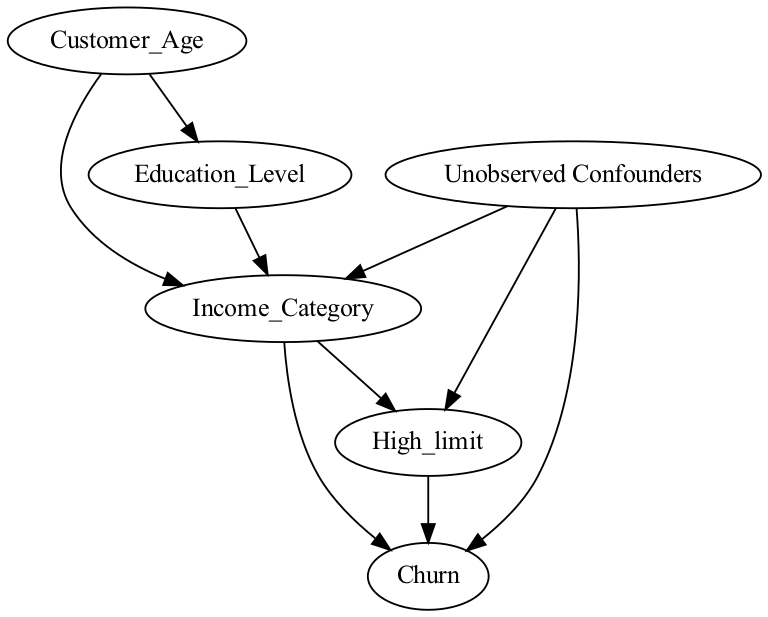

In [63]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='High_limit',
        outcome='Churn')
model.view_model()
display(Image(filename="causal_model.png"))

In [64]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [59]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [18]:
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

propensity_score_weighting
Estimation failed! No relevant identified estimand available for this estimation method.


In [19]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

ValueError: Aborting refutation! No valid estimate is provided.

In [20]:
refutel = model.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

ValueError: Aborting refutation! No valid estimate is provided.

In [21]:
refutel = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

ValueError: Aborting refutation! No valid estimate is provided.